<a href="https://colab.research.google.com/github/boemer00/deep_learning/blob/main/TF2_0_lstm_nonlinear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Part 1: Load Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.models import Sequential, Model
from keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten
from keras.optimizers import SGD, Adam

In [2]:
# create data
series = np.sin((0.1*np.arange(400))**2)

This is a time series of the form:

$x(t) = \sin(\omega t^2)$.


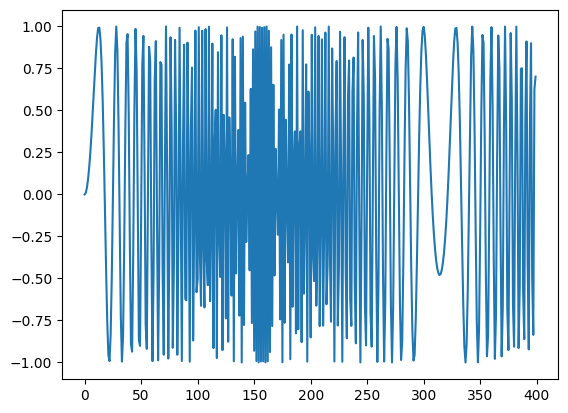

In [3]:
# plot it
plt.plot(series)
plt.show()

In [4]:
### build the dataset
# let's see if we can use T past values to predict the next value
T = 10
D = 1
X = []
Y = []
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T) # make it N x T
Y = np.array(Y)
N = len(X)

In [5]:
print('X.shape', X.shape, 'Y.shape', Y.shape)

X.shape (390, 10) Y.shape (390,)


# Part 2: Build the Model

In [6]:
# try autoregressive linear model
i = Input(shape=(T,))
x = Dense(1)(i)
model = Model(i, x)
model.compile(
    loss='mse',
    optimizer=Adam(lr=0.1)
)

# train the RNN
r = model.fit(
    X[:-N//2], Y[:-N//2],
    epochs=80,
    validation_data=(X[-N//2:], Y[-N//2:])
)

Epoch 1/80


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


7/7 [==============================] - 1s 70ms/step - loss: 1.2957 - val_loss: 0.6413
Epoch 2/80
7/7 [==============================] - 0s 34ms/step - loss: 0.5542 - val_loss: 0.8495
Epoch 3/80
7/7 [==============================] - 0s 24ms/step - loss: 0.6299 - val_loss: 0.9038
Epoch 4/80
7/7 [==============================] - 0s 19ms/step - loss: 0.5700 - val_loss: 0.7014
Epoch 5/80
7/7 [==============================] - 0s 16ms/step - loss: 0.5614 - val_loss: 0.6204
Epoch 6/80
7/7 [==============================] - 0s 31ms/step - loss: 0.5305 - val_loss: 0.6114
Epoch 7/80
7/7 [==============================] - 0s 14ms/step - loss: 0.5228 - val_loss: 0.6121
Epoch 8/80
7/7 [==============================] - 0s 18ms/step - loss: 0.5290 - val_loss: 0.6010
Epoch 9/80
7/7 [==============================] - 0s 12ms/step - loss: 0.5414 - val_loss: 0.5988
Epoch 10/80
7/7 [==============================] - 0s 19ms/step - loss: 0.5489 - val_loss: 0.6673
Epoch 11/80
7/7 [=======================

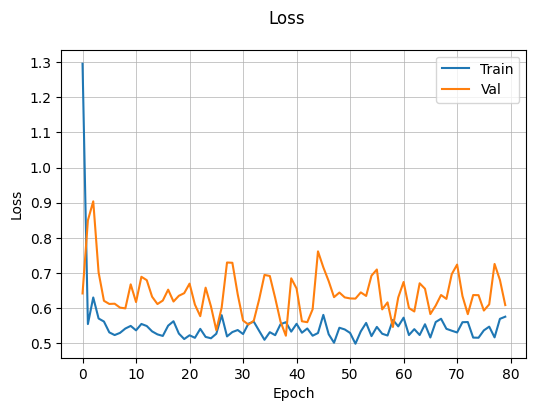

In [7]:
def plot_loss(history, title=None):
    fig, ax = plt.subplots(figsize=(6,4))

    # --- LOSS ---

    ax.plot(history.history['loss'])
    ax.plot(history.history['val_loss'])

    ax.set_ylabel('Loss')
    ax.set_xlabel('Epoch')

    ax.legend(['Train', 'Val'], loc='best')

    ax.grid(axis="x",linewidth=0.5)
    ax.grid(axis="y",linewidth=0.5)

    if title:
        fig.suptitle(title)

plot_loss(r, title='Loss')

# Part 3: Forecast

In [8]:
# One-step forecast using true targets
outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:,0]

13/13 [==============================] - 0s 5ms/step
(390, 1)


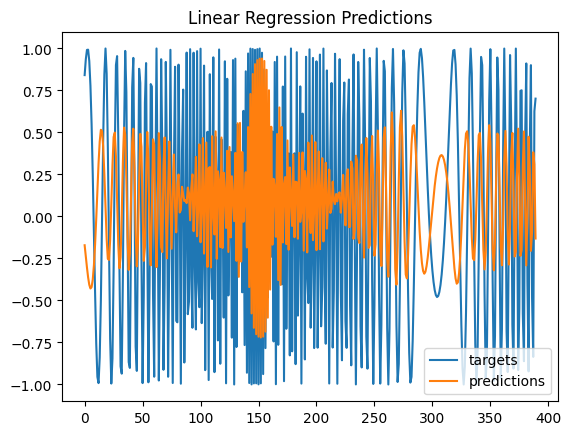

In [9]:
plt.plot(Y, label='targets')
plt.plot(predictions, label='predictions')
plt.title("Linear Regression Predictions")
plt.legend()
plt.show();

1/1 [==============================] - 0s 35ms/step


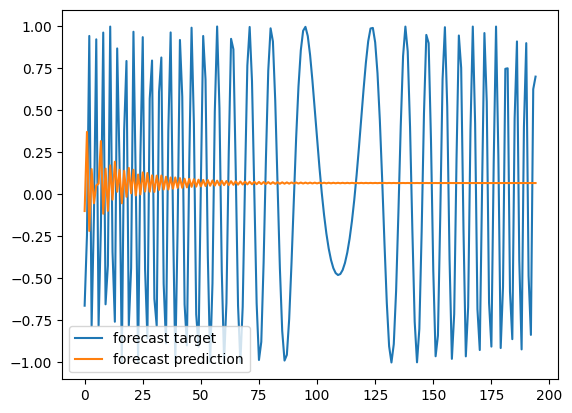

In [10]:
# Multi-step forecast
validation_target = Y[-N//2:]
validation_predictions = []

# first validation input
last_x = X[-N//2] # 1-D array of length T

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1, -1))[0,0] # 1x1 array -> scalar

  # update the predictions list
  validation_predictions.append(p)

  # make the new input
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend();

The linear model does a terrible forecast.

# LSTM

In [11]:
### Now try LSTM model
X = X.reshape(-1, T, 1) # make it N x T x D

# make the RNN
i = Input(shape=(T, D))
x = LSTM(10)(i)
x = Dense(1)(x)
model = Model(i, x)
model.compile(
  loss='mse',
  optimizer=Adam(learning_rate=0.05),
)

# train the RNN
r = model.fit(
  X[:-N//2], Y[:-N//2],
  batch_size=32,
  epochs=200,
  validation_data=(X[-N//2:], Y[-N//2:]),
)

Epoch 1/200
7/7 [==============================] - 3s 99ms/step - loss: 0.5417 - val_loss: 0.5394
Epoch 2/200
7/7 [==============================] - 0s 13ms/step - loss: 0.4914 - val_loss: 0.5922
Epoch 3/200
7/7 [==============================] - 0s 14ms/step - loss: 0.4168 - val_loss: 0.5698
Epoch 4/200
7/7 [==============================] - 0s 15ms/step - loss: 0.3677 - val_loss: 0.7932
Epoch 5/200
7/7 [==============================] - 0s 12ms/step - loss: 0.3073 - val_loss: 0.4236
Epoch 6/200
7/7 [==============================] - 0s 13ms/step - loss: 0.2537 - val_loss: 0.2914
Epoch 7/200
7/7 [==============================] - 0s 16ms/step - loss: 0.1978 - val_loss: 0.3158
Epoch 8/200
7/7 [==============================] - 0s 15ms/step - loss: 0.1560 - val_loss: 0.2095
Epoch 9/200
7/7 [==============================] - 0s 13ms/step - loss: 0.0981 - val_loss: 0.2052
Epoch 10/200
7/7 [==============================] - 0s 17ms/step - loss: 0.0702 - val_loss: 0.1776
Epoch 11/200
7/7 [=

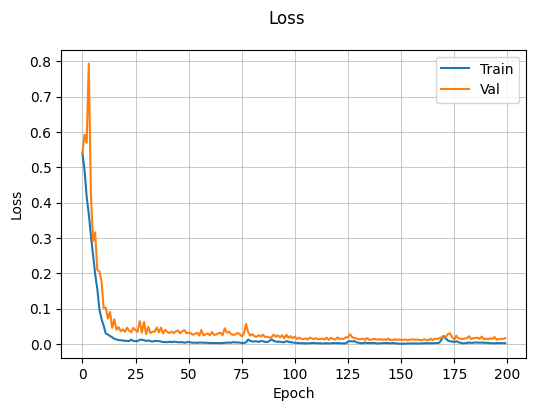

In [12]:
plot_loss(r, title='Loss')

13/13 [==============================] - 1s 3ms/step
(390, 1)


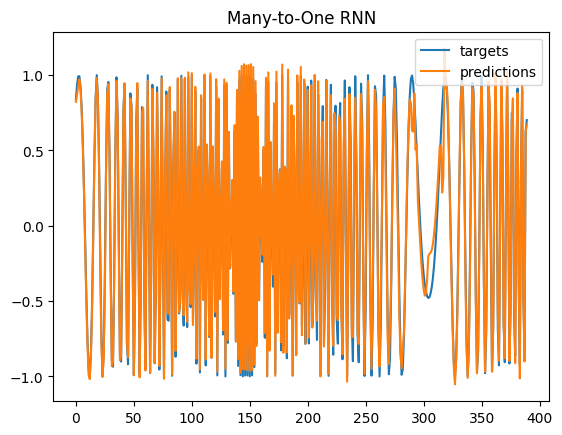

In [13]:
# One-step forecast using true targets
outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:,0]

plt.plot(Y, label='targets')
plt.plot(predictions, label='predictions')
plt.title('Many-to-One RNN')
plt.legend()
plt.show();

1/1 [==============================] - 0s 25ms/step


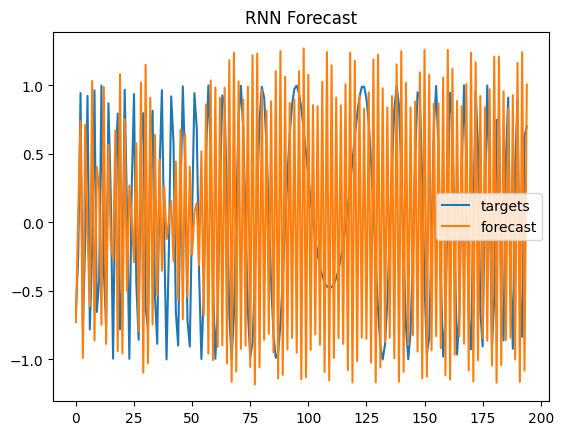

In [14]:
# Multi-step forecast
forecast = []
input_ = X[-N//2]
while len(forecast) < len(Y[-N//2:]):
  # Reshape the input_ to N x T x D
  f = model.predict(input_.reshape(1, T, 1))[0,0]
  forecast.append(f)

  # make a new input with the latest forecast
  input_ = np.roll(input_, -1)
  input_[-1] = f

plt.plot(Y[-N//2:], label='targets')
plt.plot(forecast, label='forecast')
plt.title("RNN Forecast")
plt.legend()
plt.show();

There is no real advantage using LSTM for this problem.